In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv(r"D:\Xử lý dữ liệu với Python\Cleaned Data Theanh28.Hanoi.csv", parse_dates=['time'])

## Tần suất đăng bài của các ngày trong tuần và các khoảng thời gian trong ngày

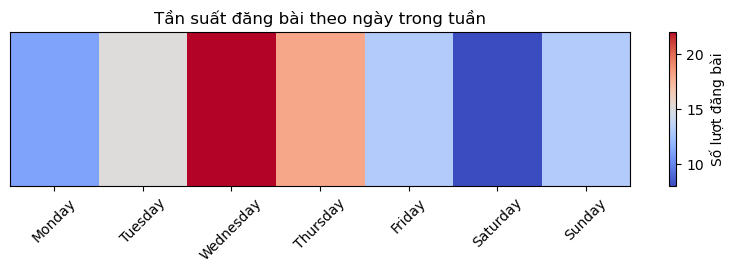

In [4]:
# Tạo cột mới là ngày trong tuần
df['weekday'] = df['time'].dt.day_name()

# Tính tần suất đăng bài cho mỗi ngày trong tuần
heatmap_data = df['weekday'].value_counts().sort_index()

# Chuyển dữ liệu thành mảng 2D để vẽ biểu đồ nhiệt
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_matrix = np.zeros((1, 7), dtype=int)
for i, day in enumerate(days_of_week):
    heatmap_matrix[0, i] = heatmap_data.get(day, 0)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 2))
plt.imshow(heatmap_matrix, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.colorbar(label='Số lượt đăng bài')
plt.title('Tần suất đăng bài theo ngày trong tuần')
plt.xticks(np.arange(len(days_of_week)), days_of_week, rotation=45)
plt.yticks([])  
plt.show()

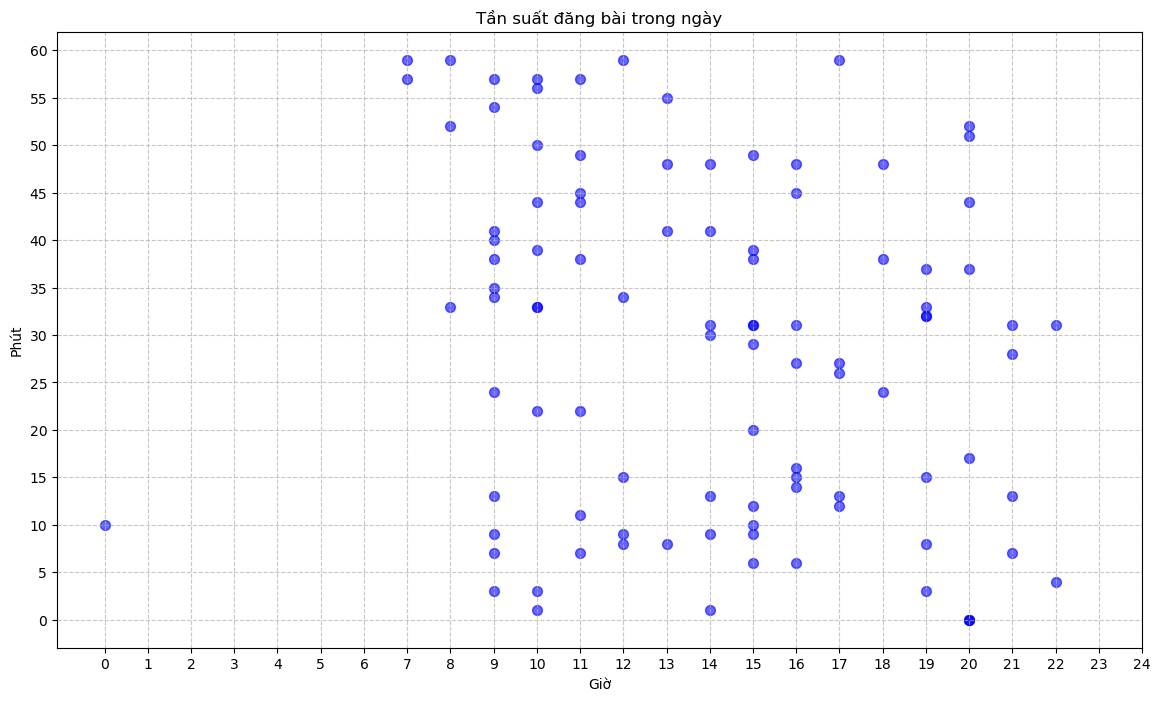

In [5]:
# Tạo cột mới là giờ và phút trong ngày
df['hour_of_day'] = df['time'].dt.hour
df['minute_of_hour'] = df['time'].dt.minute

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(df['hour_of_day'], df['minute_of_hour'], c='blue', alpha=0.6, s=50)
plt.title('Tần suất đăng bài trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Phút')
plt.xticks(range(0, 25, 1))
plt.yticks(range(0, 61, 5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Tổng số tương tác reaction 

In [23]:
reactions = df[['time','reaction_count']]
reactions

,time,reaction_count
0,2023-11-01 21:07:19,603
1,2023-11-01 20:44:54,3528
2,2023-11-01 19:32:21,1194
3,2023-11-01 17:12:32,760
4,2023-11-01 16:15:06,1394
...,...,...
95,2023-10-25 16:48:02,275
96,2023-10-25 16:14:24,1092
97,2023-10-25 15:38:41,200
98,2023-10-25 15:10:15,1123


In [24]:
reactions['reaction_count'].median()

1599.5

In [25]:
reactions['reaction_count'].mean()

3053.92

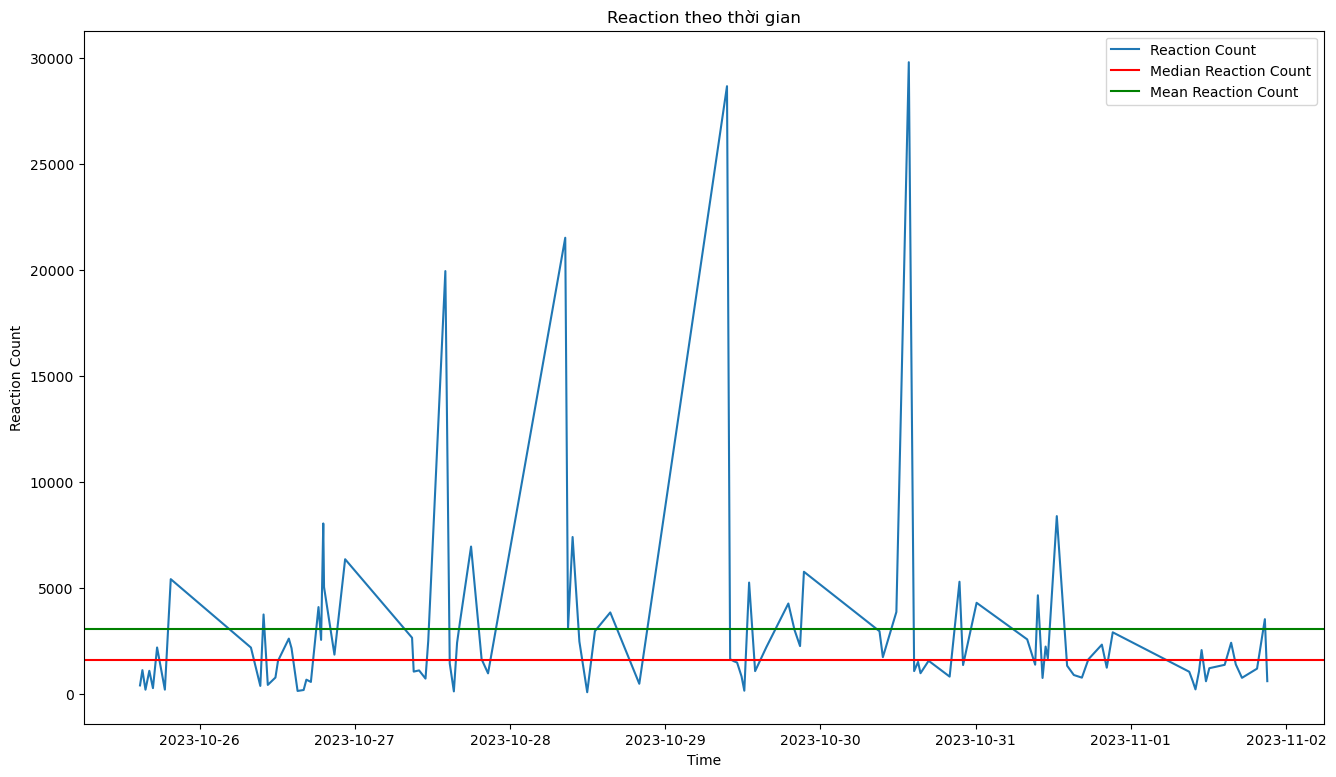

In [26]:
plt.figure(figsize=(16, 9))
plt.plot(reactions['time'], reactions['reaction_count'], label='Reaction Count')
plt.axhline(y=reactions['reaction_count'].median(), color='red', linestyle='-', label='Median Reaction Count')
plt.axhline(y=reactions['reaction_count'].mean(), color='green', linestyle='-', label='Mean Reaction Count')
plt.xlabel('Time')
plt.ylabel('Reaction Count')
plt.title('Reaction theo thời gian')
plt.legend()

In [27]:
top_reactions = reactions.nlargest(10, 'reaction_count')
print(top_reactions[['time', 'reaction_count']])

                  time  reaction_count
36 2023-10-30 13:41:06           29811
52 2023-10-29 09:34:15           28680
60 2023-10-28 08:33:33           21528
68 2023-10-27 14:01:07           19955
21 2023-10-31 12:34:18            8392
77 2023-10-26 19:08:18            8045
58 2023-10-28 09:41:44            7406
63 2023-10-27 17:59:35            6955
74 2023-10-26 22:31:13            6357
40 2023-10-29 21:28:03            5766


In [28]:
bottom_reactions = reactions.nsmallest(10, 'reaction_count')
print(bottom_reactions[['time', 'reaction_count']])

                  time  reaction_count
56 2023-10-28 11:57:15              81
66 2023-10-27 15:20:00             120
83 2023-10-26 15:09:56             141
47 2023-10-29 12:15:02             153
82 2023-10-26 16:06:12             186
97 2023-10-25 15:38:41             200
93 2023-10-25 18:38:37             203
11 2023-11-01 10:01:01             215
95 2023-10-25 16:48:02             275
90 2023-10-26 09:24:13             379


In [29]:
top4_reactions = reactions['reaction_count'].nlargest(4).index
reactions_cleaned = reactions.drop(top4_reactions).reset_index(drop=True)
reactions_cleaned

,time,reaction_count
0,2023-11-01 21:07:19,603
1,2023-11-01 20:44:54,3528
2,2023-11-01 19:32:21,1194
3,2023-11-01 17:12:32,760
4,2023-11-01 16:15:06,1394
...,...,...
91,2023-10-25 16:48:02,275
92,2023-10-25 16:14:24,1092
93,2023-10-25 15:38:41,200
94,2023-10-25 15:10:15,1123


In [30]:
reactions_cleaned['reaction_count'].median()

1551.0

In [31]:
reactions_cleaned['reaction_count'].mean()

2139.7708333333335

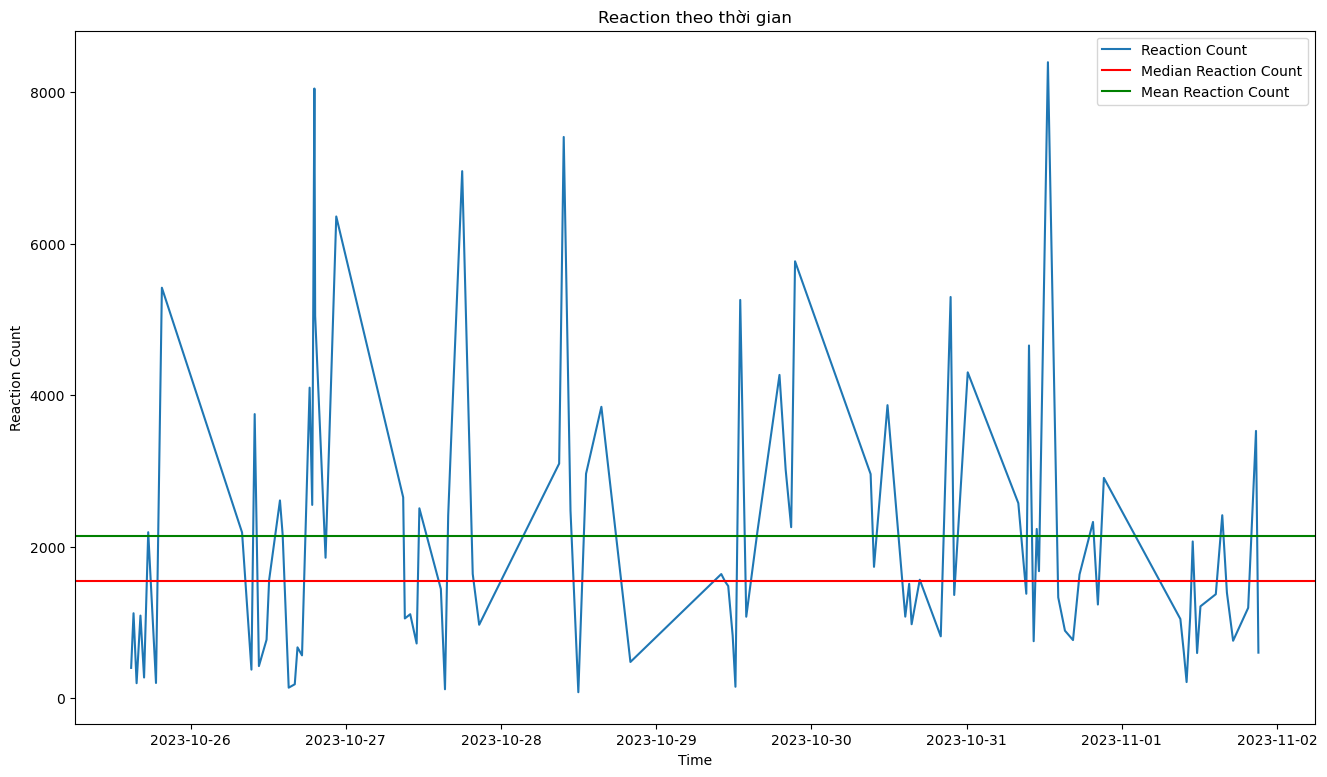

In [32]:
plt.figure(figsize=(16, 9))
plt.plot(reactions_cleaned['time'], reactions_cleaned['reaction_count'], label='Reaction Count')
plt.axhline(y=reactions_cleaned['reaction_count'].median(), color='red', linestyle='-', label='Median Reaction Count')
plt.axhline(y=reactions_cleaned['reaction_count'].mean(), color='green', linestyle='-', label='Mean Reaction Count')
plt.xlabel('Time')
plt.ylabel('Reaction Count')
plt.title('Reaction theo thời gian')
plt.legend()

## Tỉ lệ các loại reaction

In [33]:
tong_thich = df['thích'].sum()
tong_yeu_thich = df['yêu thích'].sum()
tong_haha = df['haha'].sum()
tong_wow = df['wow'].sum()
tong_thuong_thuong = df['thương thương'].sum()
tong_buon = df['buồn'].sum()
tong_phan_no = df['phẫn nộ'].sum()
print("Tổng số lượt Thích:", tong_thich)
print("Tổng số lượt Yêu thích:", tong_yeu_thich)
print("Tổng số lượt Haha:", tong_haha)
print("Tổng số lượt Wow:", tong_wow)
print("Tổng số lượt Thương thương:", tong_thuong_thuong)
print("Tổng số lượt Buồn:", tong_buon)
print("Tổng số lượt Phẫn nộ:", tong_phan_no)

Tổng số lượt Thích: 220937.0
Tổng số lượt Yêu thích: 27718.0
Tổng số lượt Haha: 14128.0
Tổng số lượt Wow: 1292.0
Tổng số lượt Thương thương: 2985.0
Tổng số lượt Buồn: 38109.0
Tổng số lượt Phẫn nộ: 223.0


Text(0.5, 1.0, 'Tỉ lệ các reactions')

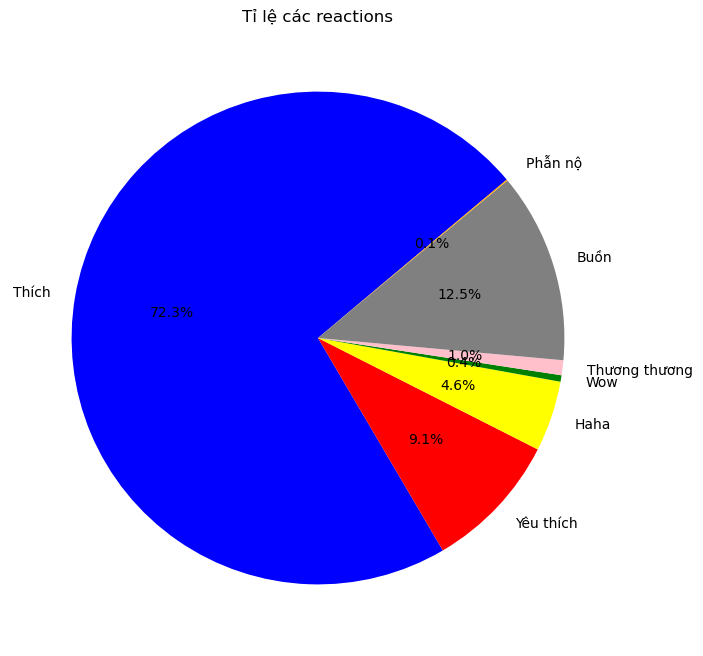

In [34]:
ti_le = [tong_thich, tong_yeu_thich, tong_haha, tong_wow, tong_thuong_thuong, tong_buon, tong_phan_no]
labels = ['Thích', 'Yêu thích', 'Haha', 'Wow', 'Thương thương', 'Buồn', 'Phẫn nộ']
colors = ['blue', 'red', 'yellow', 'green', 'pink', 'gray', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(ti_le, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Tỉ lệ các reactions')

## Tương quan giữa số lượng reaction và thời gian đăng bài trong ngày

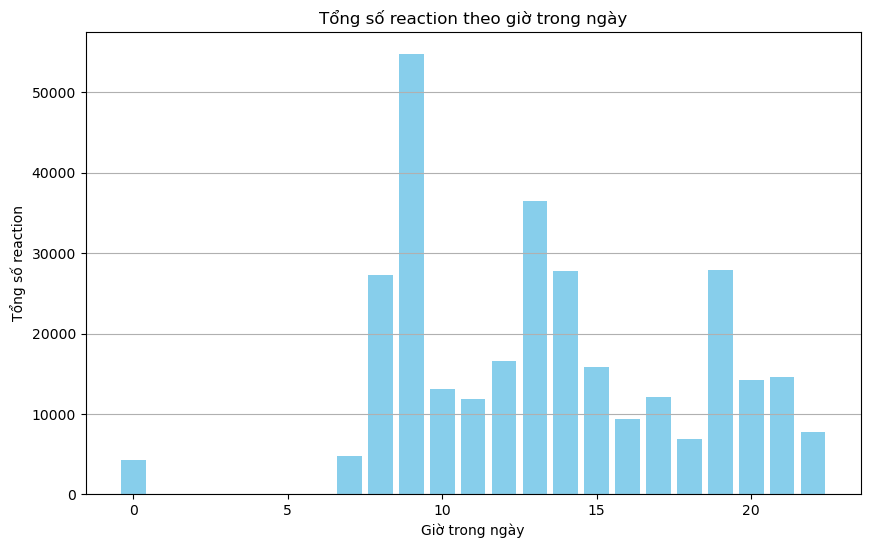

In [35]:
# Tính tổng số lượng reaction cho mỗi giờ
tong_reaction_moi_gio_truoc = df.groupby('hour_of_day')['reaction_count'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(tong_reaction_moi_gio_truoc['hour_of_day'], tong_reaction_moi_gio_truoc['reaction_count'], color='skyblue')
plt.title('Tổng số reaction theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Tổng số reaction')
plt.grid(axis='y')

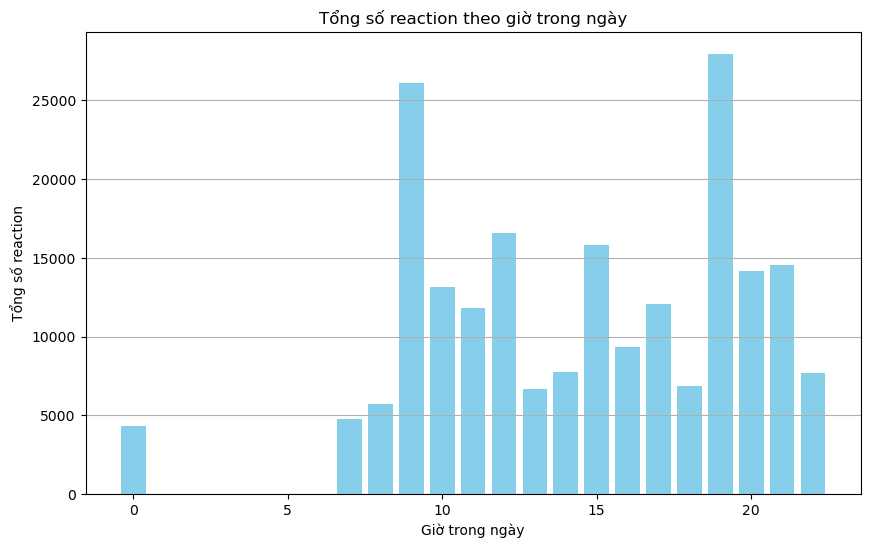

In [36]:
# Tạo cột mới là giờ trong ngày
reactions_cleaned['hour_of_day'] = reactions_cleaned['time'].dt.hour

# Tính tổng số lượng reaction cho mỗi giờ
tong_reaction_moi_gio_sau = reactions_cleaned.groupby('hour_of_day')['reaction_count'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(tong_reaction_moi_gio_sau['hour_of_day'], tong_reaction_moi_gio_sau['reaction_count'], color='skyblue')
plt.title('Tổng số reaction theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Tổng số reaction')
plt.grid(axis='y')

## Tương quan giữa reactions, comments và shares

In [37]:
comparison = df[['time','reaction_count', 'comments', 'shares']]
comparison

,time,reaction_count,comments,shares
0,2023-11-01 21:07:19,603,28,11
1,2023-11-01 20:44:54,3528,550,11
2,2023-11-01 19:32:21,1194,91,9
3,2023-11-01 17:12:32,760,135,8
4,2023-11-01 16:15:06,1394,116,21
...,...,...,...,...
95,2023-10-25 16:48:02,275,19,6
96,2023-10-25 16:14:24,1092,76,8
97,2023-10-25 15:38:41,200,15,15
98,2023-10-25 15:10:15,1123,77,2


## Phân bố của reactions, comments và shares

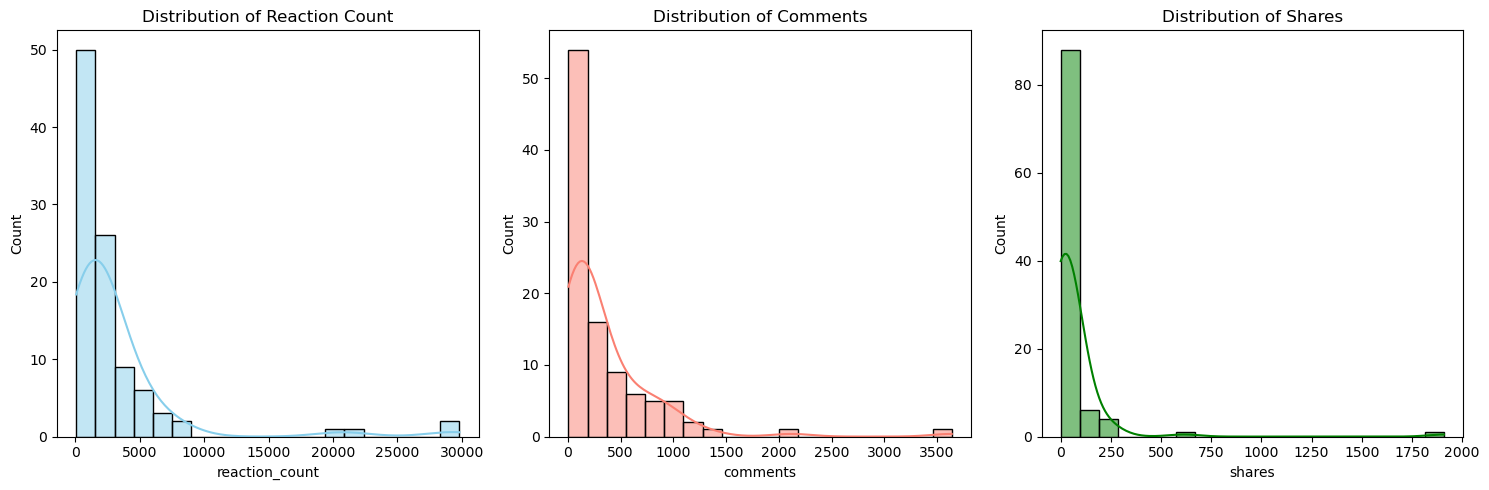

In [8]:
# Vẽ biểu đồ phân bố
plt.figure(figsize=(15, 5))

# Biểu đồ phân bố của reaction_count
plt.subplot(1, 3, 1)
sns.histplot(df['reaction_count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Reaction Count')

# Biểu đồ phân bố của comments
plt.subplot(1, 3, 2)
sns.histplot(df['comments'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Comments')

# Biểu đồ phân bố của shares
plt.subplot(1, 3, 3)
sns.histplot(df['shares'], bins=20, kde=True, color='green')
plt.title('Distribution of Shares')

plt.tight_layout()
plt.show()

## Tỉ lệ reactions, comments và shares theo thời gian

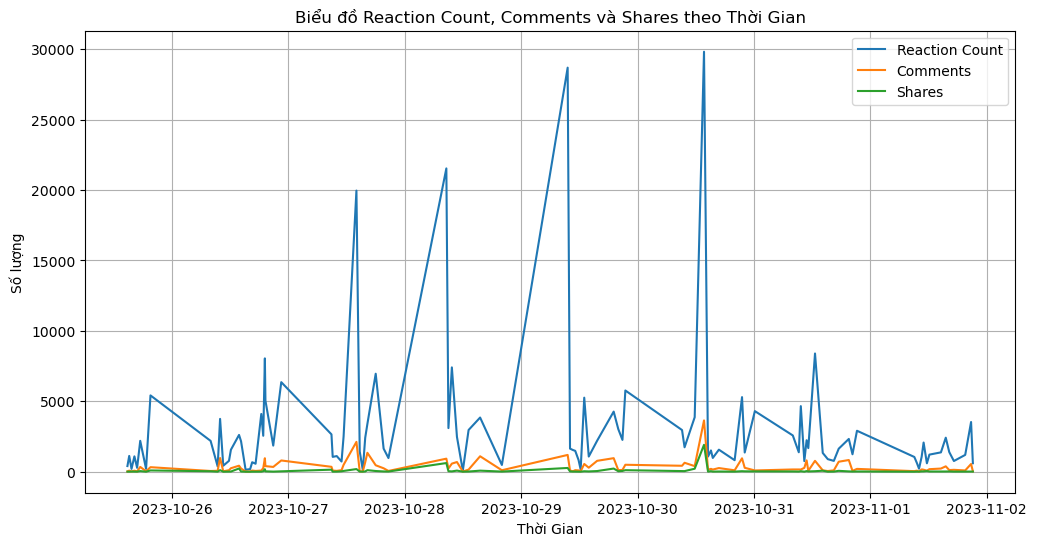

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(comparison['time'], comparison['reaction_count'], label='Reaction Count')
plt.plot(comparison['time'], comparison['comments'], label='Comments')
plt.plot(comparison['time'], comparison['shares'], label='Shares')

plt.title('Biểu đồ Reaction Count, Comments và Shares theo Thời Gian')
plt.xlabel('Thời Gian')
plt.ylabel('Số lượng')
plt.legend()
plt.grid(True)

## Phân bố của reactions so với tổng comments và shares

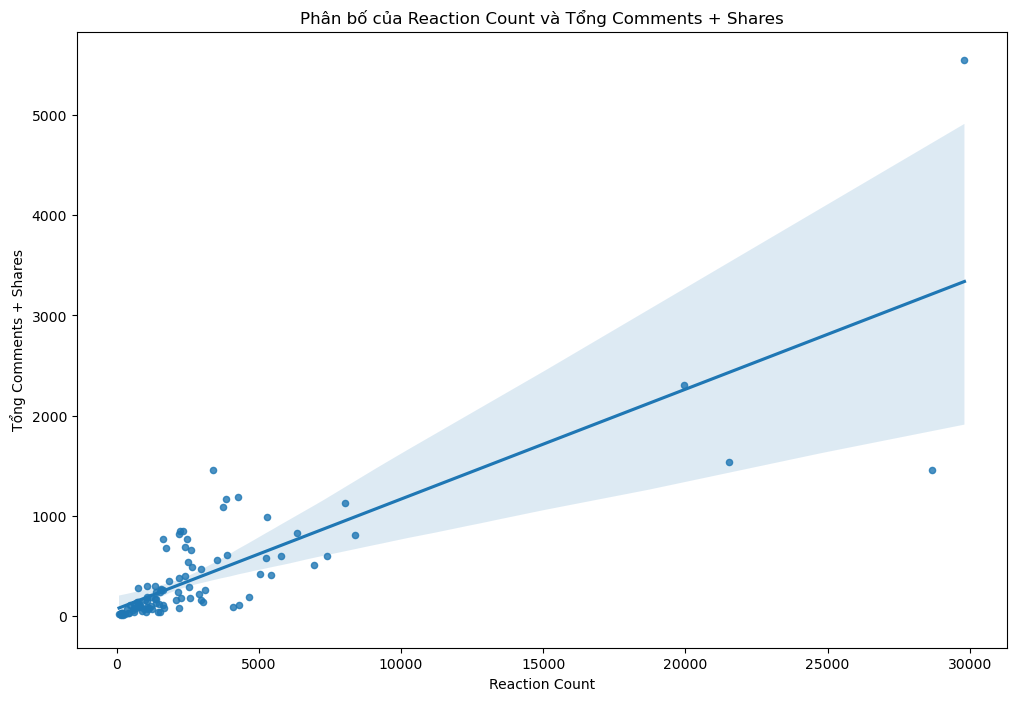

In [9]:
# Sắp xếp dataframe theo thời gian
df = df.sort_values(by='time')

# Tạo cột mới là tổng của comments và shares
df['total_interactions'] = df['comments'] + df['shares']

# Vẽ biểu đồ regplot
plt.figure(figsize=(12, 8))

sns.regplot(x=df['reaction_count'], y=df['total_interactions'], scatter_kws={'s': 20})

plt.title('Phân bố của Reaction Count và Tổng Comments + Shares')
plt.xlabel('Reaction Count')
plt.ylabel('Tổng Comments + Shares')
plt.show()

## Tương quan giữa số lượng reaction và độ dài bài viết

In [39]:
df['length'] = df['text'].apply(len)
df[['length','reaction_count']]

,length,reaction_count
0,122,603
1,81,3528
2,70,1194
3,317,760
4,49,1394
...,...,...
95,20,275
96,36,1092
97,52,200
98,191,1123


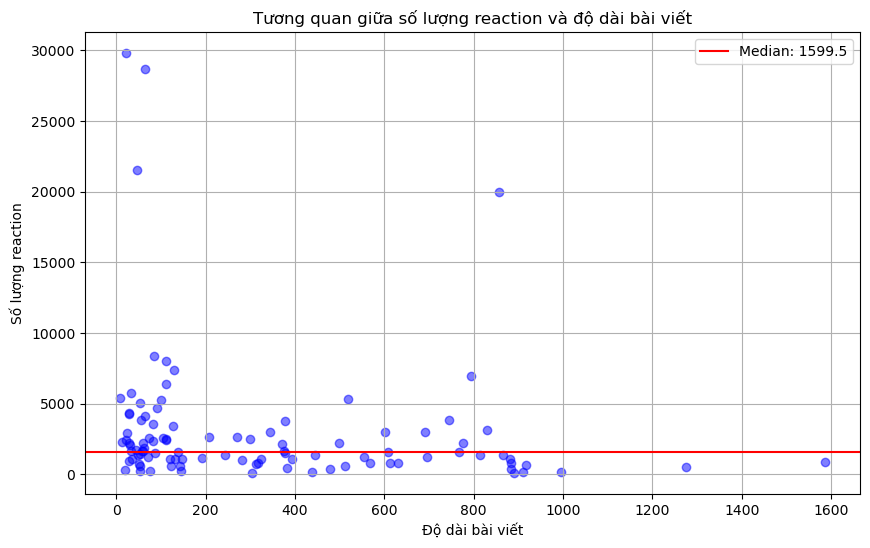

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['length'], df['reaction_count'], c='blue', alpha=0.5)
plt.title('Tương quan giữa số lượng reaction và độ dài bài viết')
plt.xlabel('Độ dài bài viết')
plt.ylabel('Số lượng reaction')
median_value = df['reaction_count'].median()
plt.axhline(y=median_value, color='red', linestyle='-', label=f'Median: {median_value}')
plt.legend()
plt.grid(True)

## Bài viết tương tác cao nhất

In [41]:
max_reaction_post = df.loc[df['reaction_count'].idxmax()]
max_reaction_post

post_id                                             782457510558657
text                                         Tự nhiên thấy nhớ nhà 
time                                            2023-10-30 13:41:06
timestamp                                                1698648066
comments                                                       3640
shares                                                         1910
post_url          https://facebook.com/Theanh28.Hanoi/posts/7824...
comments_full     [{'comment_id': '244568898610948', 'comment_ur...
reactors          [{'name': 'Pé Nấm', 'link': 'https://facebook....
reaction_count                                                29811
thích                                                       13040.0
yêu thích                                                   14430.0
haha                                                           13.0
wow                                                             1.0
thương thương                                   

Text(0.5, 1.0, 'Tỉ lệ các reactions')

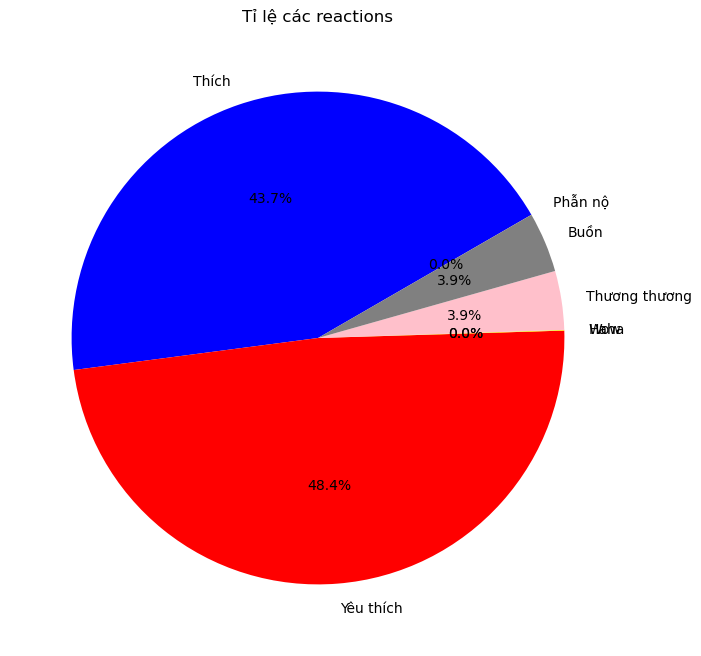

In [42]:
kind_of_reaction = [max_reaction_post['thích'], max_reaction_post['yêu thích'], max_reaction_post['haha'], max_reaction_post['wow'], max_reaction_post['thương thương'], max_reaction_post['buồn'], max_reaction_post['phẫn nộ']]
labels = ['Thích', 'Yêu thích', 'Haha', 'Wow', 'Thương thương', 'Buồn', 'Phẫn nộ']
colors = ['blue', 'red', 'yellow', 'green', 'pink', 'gray', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(kind_of_reaction, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
plt.title('Tỉ lệ các reactions')

## Tần suất của các từ được sử dụng trong các bài đăng và từ khóa “Hà Nội”

In [43]:
# Tìm các bài viết chứa 1 từ khóa nào đó
full_post = df['text'].tolist()
post_list = []
for i in full_post :
  if "Hà Nội" in i: post_list.append(i)
print(len(post_list),"bài viết chưa từ khóa trên")

42 bài viết chưa từ khóa trên


In [44]:
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
import os

In [45]:
# Gộp tất cả các bài viết vào 1 string
text = "" 
for i in df['text']:
  text = text + i + "\n"

(-0.5, 499.5, 299.5, -0.5)

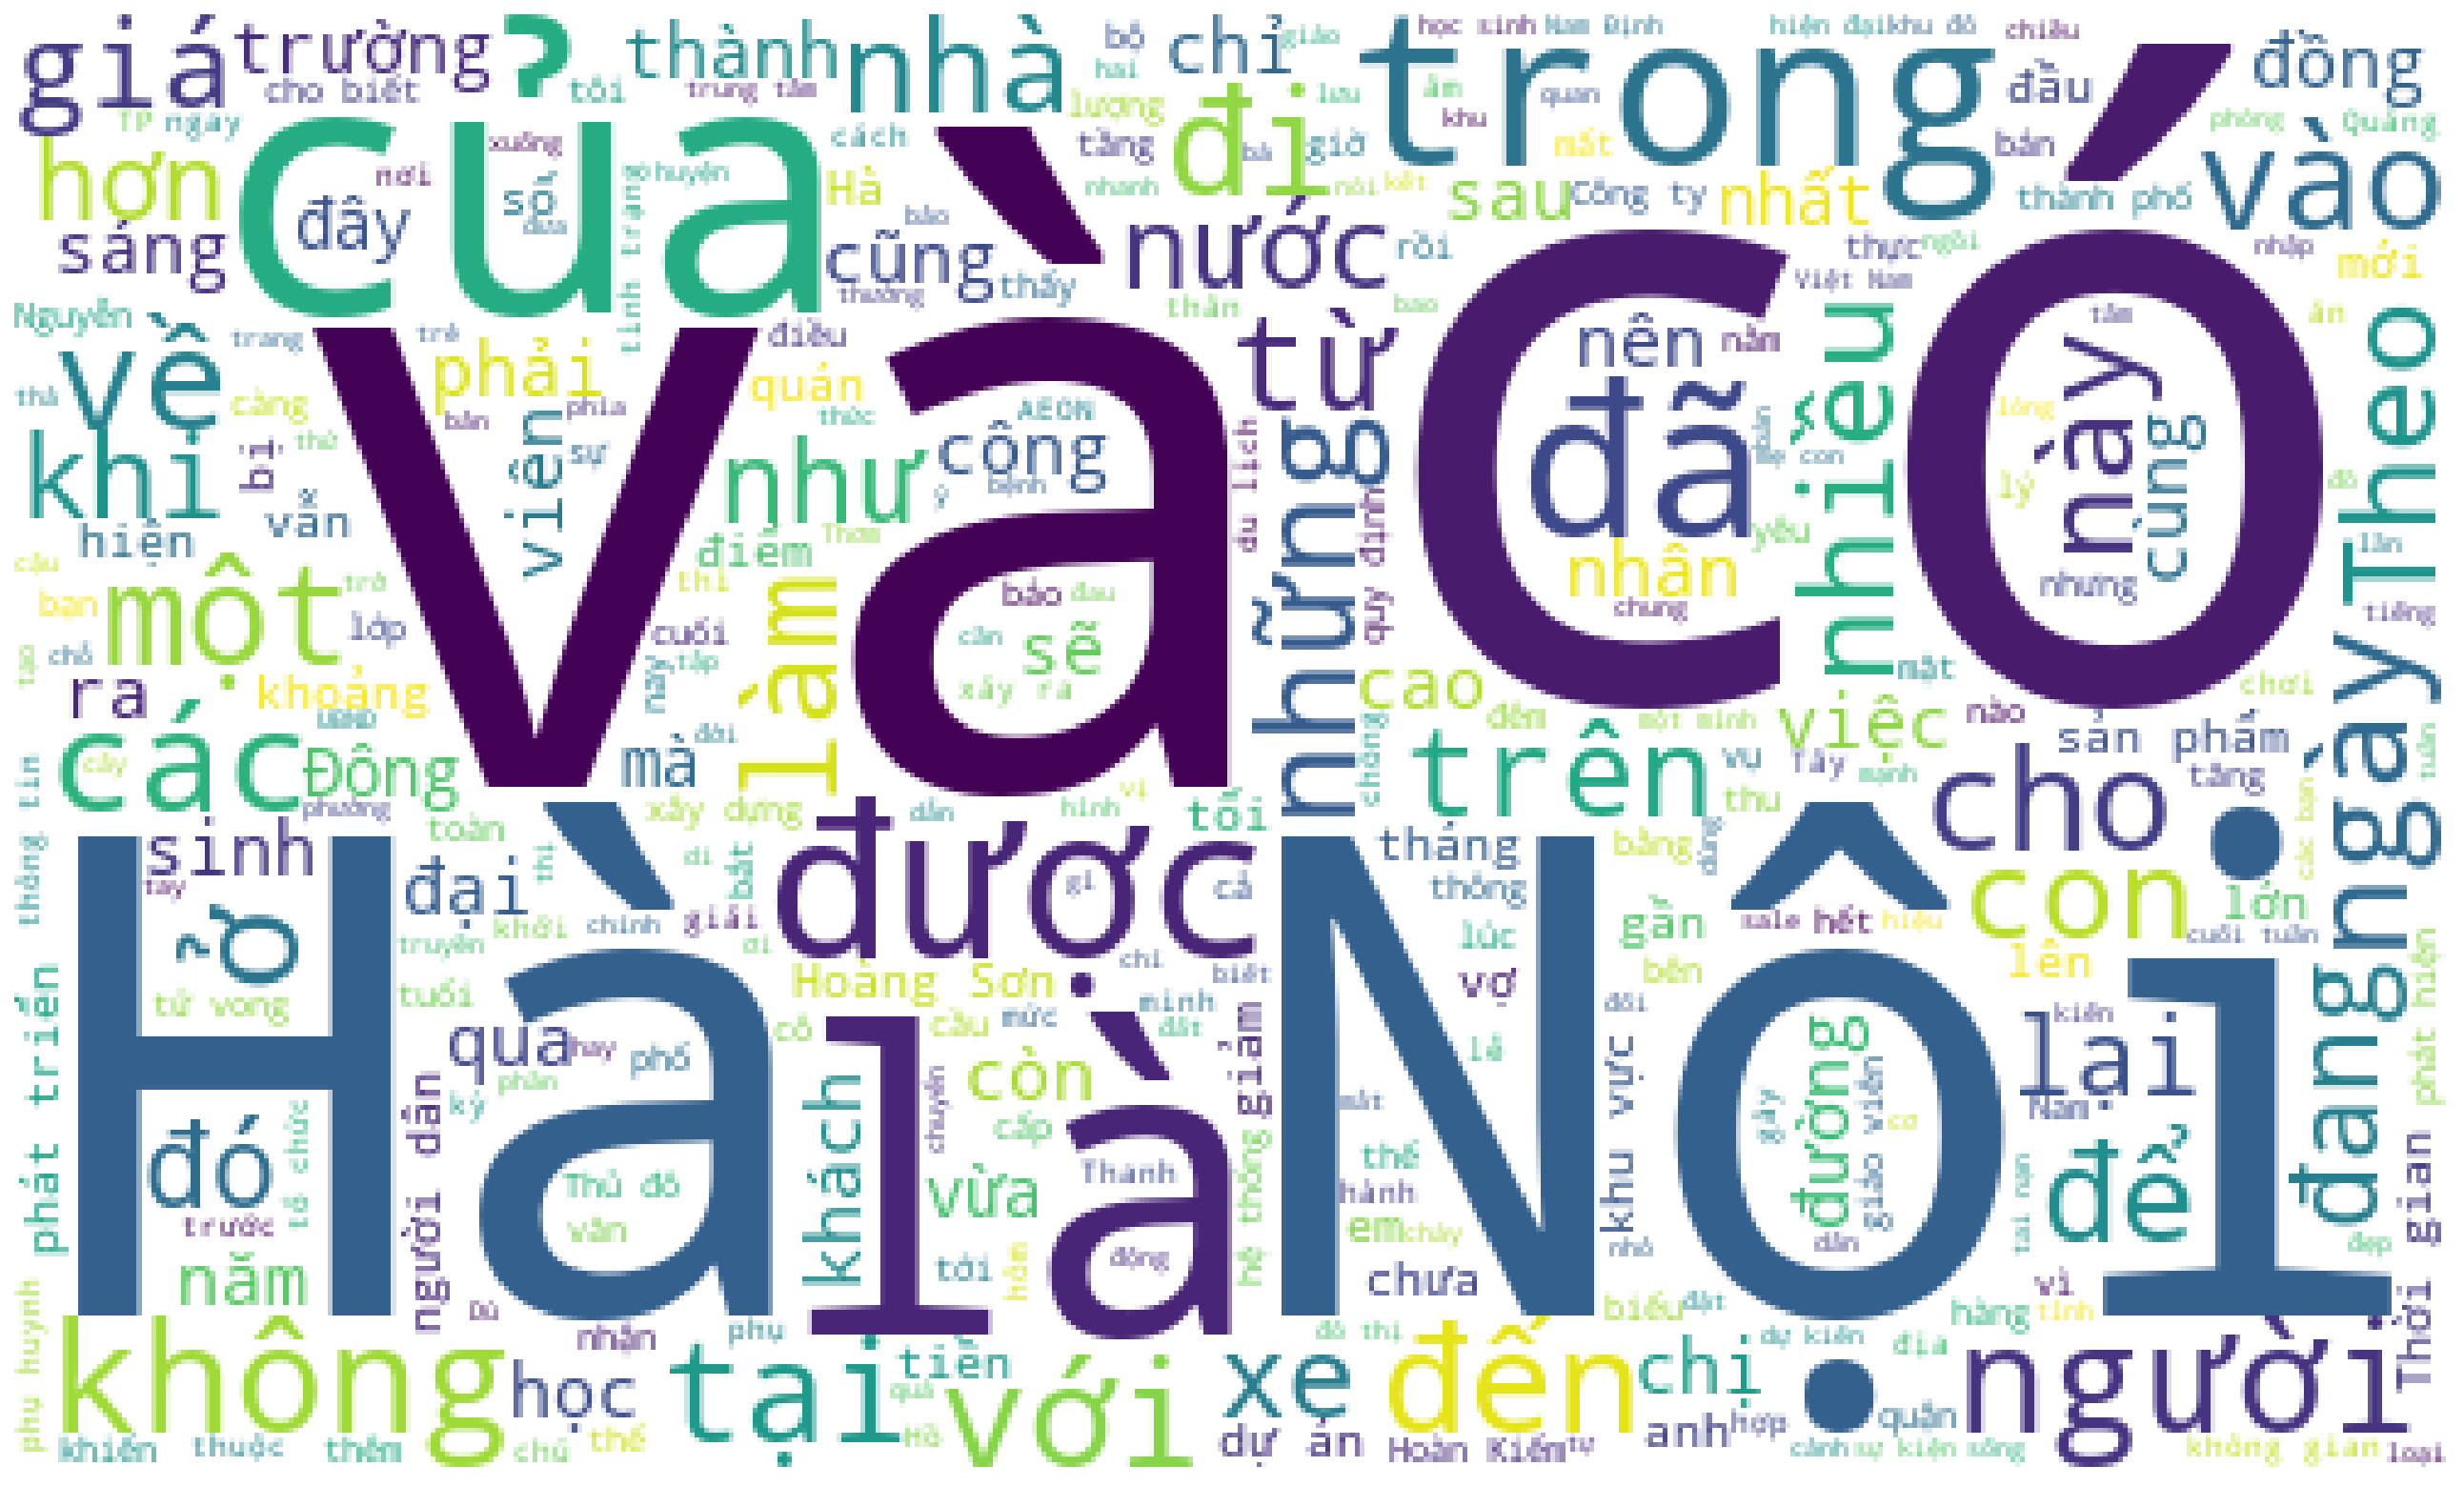

In [46]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')

## Keyword của bài đăng

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

In [48]:
# Lấy list các stop words
def get_stopwords_list(stop_file_path):
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

In [50]:
stop_words_path_1 = r"D:\Xử lý dữ liệu với Python\vietnamese-stopwords1.txt"
stop_words_path_2 = r"D:\Xử lý dữ liệu với Python\vietnamese-stopwords2.txt"
stop_words_1 = get_stopwords_list(stop_words_path_1)
stop_words_2 = get_stopwords_list(stop_words_path_2)
print(f"Số lượng stopwords là: {len(stop_words_1) + len(stop_words_2)}")

Số lượng stopwords là: 1956


In [51]:
for i in stop_words_1:
  text = text.replace(i,"")

In [52]:
# tìm số từ xuất hiện trong bài đăng
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#tìm số câu xuất hiện trong bài đăng
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

6743
240


In [53]:
# Tính TF cho mỗi từ
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words_2:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

In [54]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words_1:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())


# tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 

In [55]:
# Lấy các từ quan trong nhất 
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 7)

{'Hà': 0.009560534072791638,
 'Nội': 0.007320611742156812,
 'xe': 0.005908278167374093,
 'phẩm': 0.005756524115580147,
 'học': 0.005534907958968124,
 'Quốc': 0.004934163527640127,
 'AEON': 0.004923611906721849}

In [7]:
df[['comments_full','reactors']]

,comments_full,reactors
0,"[{'comment_id': '868569874866743', 'comment_ur...",[]
1,"[{'comment_id': '372967025059392', 'comment_ur...","[{'name': 'Giang Dư', 'link': 'https://faceboo..."
2,"[{'comment_id': '204649179329266', 'comment_ur...","[{'name': 'Gọi Em Là Mun', 'link': 'https://fa..."
3,"[{'comment_id': '1489862385189685', 'comment_u...","[{'name': 'Tran Quang Truong', 'link': 'https:..."
4,"[{'comment_id': '320274400626234', 'comment_ur...","[{'name': 'Tran Quang Truong', 'link': 'https:..."
...,...,...
95,"[{'comment_id': '334128855967896', 'comment_ur...","[{'name': 'Mai Lan', 'link': 'https://facebook..."
96,"[{'comment_id': '633431992290309', 'comment_ur...","[{'name': 'Tran Quang Truong', 'link': 'https:..."
97,"[{'comment_id': '852785842964921', 'comment_ur...","[{'name': 'Dũng Hoàng', 'link': 'https://faceb..."
98,"[{'comment_id': '633558335637773', 'comment_ur...",[]
